# Reinforcement Learning
CartPole is pretty much the Hello World problem for Reinforcement learning. In this Excercies we will first explore the observation/action space of the environment and then create a Neural Network capable of solving it.

In [1]:
!pip install gym
import gym, time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to display plots in our notebook
%matplotlib inline 

# The Environment
Openai was kind enough to create a now commonly used collection of reinforcement learning problems with an easy to use API, called openai gym (https://gym.openai.com/envs/#classic_control). Whilst this extensive library includes all kinds of interesting environments such as Atari games or robotic control, today we will focus on the "hello world" problem of RL, namely CartPole.
Before we can start building our Neural Network, we should first try to understand the problem at hand. To that end, we will execute the environment with random actions whilst rendering each frame and printing everything we can.

In [2]:
env = gym.make("CartPole-v0")     # initialize the environment 


# before executing the environment, we have to reset it 
# (which will return the initial observation)
for _ in range(10):
    observation = env.reset()
    done = False 
    while not done:
        action = env.action_space.sample()   # a sample action from the allowed action-space
        env.render() # not necessary and not advisible whilst training (slows everything down substatially)
        time.sleep(1/45)
        observation, reward, done, info = env.step(action)
        print(f"Action:\t\t{action}")
        print(f"Observation:\t{observation}")
        print(f"Reward:\t\t{reward}")
        print(f"Done:\t\t{done}")
        print(f"Info:\t\t{info}\n")
env.close() # not 100% necessary but good practice.

Action:		1
Observation:	[ 0.01927805  0.22863281  0.00376102 -0.32425964]
Reward:		1.0
Done:		False
Info:		{}

Action:		0
Observation:	[ 0.0238507   0.03345751 -0.00272417 -0.03039302]
Reward:		1.0
Done:		False
Info:		{}

Action:		1
Observation:	[ 0.02451985  0.22861842 -0.00333203 -0.32393421]
Reward:		1.0
Done:		False
Info:		{}

Action:		1
Observation:	[ 0.02909222  0.42378766 -0.00981072 -0.61766606]
Reward:		1.0
Done:		False
Info:		{}

Action:		0
Observation:	[ 0.03756798  0.22880412 -0.02216404 -0.32808913]
Reward:		1.0
Done:		False
Info:		{}

Action:		0
Observation:	[ 0.04214406  0.0340046  -0.02872582 -0.04247732]
Reward:		1.0
Done:		False
Info:		{}

Action:		0
Observation:	[ 0.04282415 -0.1606939  -0.02957537  0.24100572]
Reward:		1.0
Done:		False
Info:		{}

Action:		1
Observation:	[ 0.03961027  0.03483777 -0.02475525 -0.06085741]
Reward:		1.0
Done:		False
Info:		{}

Action:		1
Observation:	[ 0.04030703  0.23030575 -0.0259724  -0.36124685]
Reward:		1.0
Done:		False
Info:		{}

A

Action:		0
Observation:	[-0.00551379 -0.58246736  0.03816894  0.90713289]
Reward:		1.0
Done:		False
Info:		{}

Action:		0
Observation:	[-0.01716314 -0.7780847   0.0563116   1.21156413]
Reward:		1.0
Done:		False
Info:		{}

Action:		0
Observation:	[-0.03272483 -0.97388656  0.08054288  1.52134823]
Reward:		1.0
Done:		False
Info:		{}

Action:		0
Observation:	[-0.05220256 -1.16988411  0.11096985  1.83804549]
Reward:		1.0
Done:		False
Info:		{}

Action:		1
Observation:	[-0.07560024 -0.97614944  0.14773076  1.58178915]
Reward:		1.0
Done:		False
Info:		{}

Action:		1
Observation:	[-0.09512323 -0.78306227  0.17936654  1.33858819]
Reward:		1.0
Done:		False
Info:		{}

Action:		0
Observation:	[-0.11078448 -0.97993141  0.20613831  1.68160577]
Reward:		1.0
Done:		False
Info:		{}

Action:		0
Observation:	[-0.13038311 -1.17675861  0.23977042  2.03077227]
Reward:		1.0
Done:		True
Info:		{}

Action:		0
Observation:	[ 0.03912942 -0.16970536  0.02706548  0.2997411 ]
Reward:		1.0
Done:		False
Info:		{}

Ac

Action:		1
Observation:	[-0.0253461  -0.75183683  0.03942171  0.65724632]
Reward:		1.0
Done:		False
Info:		{}

Action:		1
Observation:	[-0.04038284 -0.55728516  0.05256664  0.37723252]
Reward:		1.0
Done:		False
Info:		{}

Action:		0
Observation:	[-0.05152854 -0.75311275  0.06011129  0.68601564]
Reward:		1.0
Done:		False
Info:		{}

Action:		1
Observation:	[-0.0665908  -0.55887452  0.0738316   0.4128466 ]
Reward:		1.0
Done:		False
Info:		{}

Action:		0
Observation:	[-0.07776829 -0.75496115  0.08208853  0.72786201]
Reward:		1.0
Done:		False
Info:		{}

Action:		1
Observation:	[-0.09286751 -0.56106419  0.09664577  0.4621029 ]
Reward:		1.0
Done:		False
Info:		{}

Action:		1
Observation:	[-0.10408879 -0.36743149  0.10588783  0.20137889]
Reward:		1.0
Done:		False
Info:		{}

Action:		1
Observation:	[-0.11143742 -0.17397074  0.10991541 -0.05611403]
Reward:		1.0
Done:		False
Info:		{}

Action:		1
Observation:	[-0.11491684  0.01941759  0.10879313 -0.31219589]
Reward:		1.0
Done:		False
Info:		{}

A

Action:		0
Observation:	[ 0.10689109  0.43097156  0.00822437 -0.48307275]
Reward:		1.0
Done:		False
Info:		{}

Action:		1
Observation:	[ 0.11551052  0.62597647 -0.00143709 -0.77315229]
Reward:		1.0
Done:		False
Info:		{}

Action:		0
Observation:	[ 0.12803005  0.43087432 -0.01690013 -0.48092187]
Reward:		1.0
Done:		False
Info:		{}

Action:		0
Observation:	[ 0.13664753  0.23599496 -0.02651857 -0.19361297]
Reward:		1.0
Done:		False
Info:		{}

Action:		1
Observation:	[ 0.14136743  0.43148602 -0.03039083 -0.49454201]
Reward:		1.0
Done:		False
Info:		{}

Action:		1
Observation:	[ 0.14999715  0.62702309 -0.04028167 -0.79664571]
Reward:		1.0
Done:		False
Info:		{}

Action:		0
Observation:	[ 0.16253762  0.43247636 -0.05621458 -0.51690195]
Reward:		1.0
Done:		False
Info:		{}

Action:		0
Observation:	[ 0.17118714  0.23818914 -0.06655262 -0.24244986]
Reward:		1.0
Done:		False
Info:		{}

Action:		1
Observation:	[ 0.17595093  0.4341955  -0.07140162 -0.55536054]
Reward:		1.0
Done:		False
Info:		{}

A

Action:		1
Observation:	[-0.0538372   0.0118715   0.02613874  0.09036011]
Reward:		1.0
Done:		False
Info:		{}

Action:		1
Observation:	[-0.05359977  0.20660923  0.02794594 -0.19396279]
Reward:		1.0
Done:		False
Info:		{}

Action:		0
Observation:	[-0.04946758  0.0110989   0.02406668  0.10740324]
Reward:		1.0
Done:		False
Info:		{}

Action:		0
Observation:	[-0.04924561 -0.18435952  0.02621475  0.40758088]
Reward:		1.0
Done:		False
Info:		{}

Action:		0
Observation:	[-0.0529328  -0.37984318  0.03436637  0.70841188]
Reward:		1.0
Done:		False
Info:		{}

Action:		0
Observation:	[-0.06052966 -0.57542389  0.0485346   1.01171144]
Reward:		1.0
Done:		False
Info:		{}

Action:		0
Observation:	[-0.07203814 -0.77115865  0.06876883  1.31923141]
Reward:		1.0
Done:		False
Info:		{}

Action:		0
Observation:	[-0.08746131 -0.96707938  0.09515346  1.63261998]
Reward:		1.0
Done:		False
Info:		{}

Action:		1
Observation:	[-0.1068029  -0.77319484  0.12780586  1.37104169]
Reward:		1.0
Done:		False
Info:		{}

A

Ok, let's analyse what we can see above.

    1. Action
        As expected, the action-space is discrete and binary (either 0 or 1).
        A quick check of the documentation (https://github.com/openai/gym/wiki/CartPole-v0)
        reveals that action 0 represents a "push" left, and action 1 a "push" to the right.

    2. Observation
        The observation space consists of 4 floats, namely:
        [0]   Cart Position   [-2.4,2.4]
        [1]   Cart Velocity   [-Inf,Inf]
        [2]   Pole Angle      [-41.8,41.8]
        [3]   Pole Velocity   [-Inf,Inf]

    3. Reward
        The reward function for this environment is very straight forward. 
        For every frame you survive it will return 1. Therefore total reward = # frames survived
        
    4. Done
        Three different conditions can terminate the game (set done to True)
            1. The absolute Pole Angle is greater than 12
            2. The absolute Car Position is greater than 2.4
            3. After 200 frames (solved)

    5. Info
        In this environment "Info" is empty. In atari environments 
        (https://gym.openai.com/envs/#atari) this will represent the lives.
        
        
        
The official openai documentation considers this environment solved when the average reward over 100 episodes is greater/equal 195.0

Since we now have a pretty good understanding of the environment, the question remains, how can we solve it.

# DQN (Deep Q Learning)
The usual mainstream approach would be to use a technique called Deep Q Learning, which was first introduced in DeepMind's legendary paper "Human-level control through deep reinforcement learning" (link: https://deepmind.com/research/open-source/dqn). The Q in DQN stands for Quality, which already gives away what this strategy is all about. Namely, estimating the Quality of all available actions during a specific observation (i.e. at the current state of the game, if I were to choose action 1, what do I estimate the total score to be. In this tutorial, however, we will take a slightly more primitive approach, namely, turn the task at hand into a classification problem.

# Epsilon-Decreasing
Since we decided to approach this challenge as a Binary Classification (action_space = 2), we need to have a function that determines whether a state-action pair is appended to the training data. One straight forward approach to doing this is by only appending the data if the current score exceeds some threshold (which we will increase over time).

Now, to make sure that we do not become biased towards a specific action to soo (exploitation), we will continue to introduce some random actions (exploration). This is done via a variable called epsilon (representing the percentage probability of taking a random action), which we will gradually decrease over time.

One of the challenges here will be to pick a reasonable score-threshold. So let's play a few games and keep track of the score so that we get a basic understanding of how well a random agent will perform.

Min Score:     8.0
Mean Score:    22.496
Median Score:  19.0
Max Score:     106.0


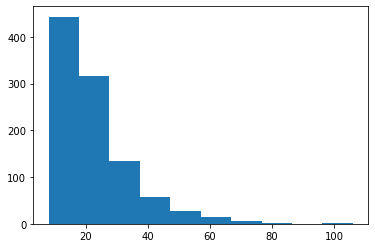

In [3]:
score_list = []

for game_nr in range(1_000):
    score = done = 0   # in python False==0
    env.reset()
    while not done:
        _, reward, done, _ = env.step(env.action_space.sample())
        score+=reward
    score_list.append(score)
    print(f"{game_nr}/{100}", end="\r") # to keep track of things (not necessary)
env.close() # not necessary but good practice

print(f"Min Score:     {np.min(score_list)}")
print(f"Mean Score:    {np.mean(score_list)}")
print(f"Median Score:  {np.median(score_list)}")
print(f"Max Score:     {np.max(score_list)}")

plt.hist(score_list)
plt.show()

Seems like something around __ would sever as a good initial threshold. To be honest, this choice is somewhat arbitrary and I would encourage you to play around with it a little.

# Neural Networks
Now that we know what our initial score-threshold will be, let's build the Neural Network. Since this is something that has already been covered, I'll purpousefully create an architecture that will not converge, so that you can play around with it a little.

In [4]:
!pip install torch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [5]:
n = len(env.observation_space.sample()) # number of features 
num_labels = 1 #env.action_space.n   we use 1 instead of 2 since this is binary


net = nn.Sequential(
    nn.Linear(n, "hidden-layer-1"),
    nn.ReLU(),
    nn.Linear("hidden-layer-1", "hidden-layer-2"),
    nn.ReLU(),
    nn.Linear("hidden-layer-2", num_labels),
    nn.Sigmoid())

In [6]:
def get_action(obs):
    if np.random.uniform() < epsilon:
        # exploration
        return env.action_space.sample()
    
    else:
        # exploitation
        obs = Variable(torch.from_numpy(obs.reshape(-1)).float(), requires_grad=False)
        return int(net(obs).detach().numpy() > .5)

In [7]:
# Initialize the network and all relevant variables/CONSTANTS
LR = 1e-2
EPOCHS = 5
BATCH_SIZE = 1024

loss_fn = nn.BCELoss() # Binary Cross-Entropy loss (since this is a binary classification problem)
optimizer = optim.Adam(net.parameters(), lr=LR)


epsilon = 1. #100% exploration (initially)
EPSILON_DECAY = "This is for you to play around with"

score_threshold = "pretty arbitrary tbh"

TOTAL_GAMES = 20_000
X_train = []
y_train = []


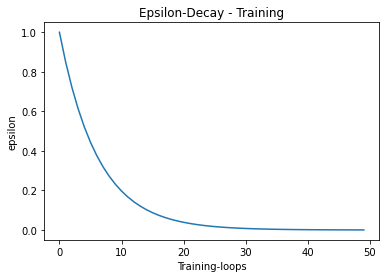

In [8]:
# let's plot our epsilon decay as a quick sanity check

# the first plot is very straight forward, we simply compare the epsilon to each training loop
plt.plot(np.arange(0, 50), epsilon*EPSILON_DECAY**(np.arange(0, 50)))
plt.title("Epsilon-Decay - Training")
plt.xlabel("Training-loops")
plt.ylabel("epsilon")
plt.show()


Now that everything is set up, we are ready to start our training process. Recall that for this environment to be solved, you will have to achieve an average score of 195 (or above) for 100 consecutive episodes. The fewer training episodes you require to achieve this, the better. We will check after each training whether we are able to solve it (using 100% exploitation).

In [9]:
def check_if_solved():
    avg_score = 0
    for c_game in range(1, 101):
        done = 0
        obs = env.reset()
        while not done:
            obs = Variable(torch.from_numpy(obs.reshape(-1)).float(), requires_grad=False)
            action = int(net(obs).detach().numpy() > .5)
            
            obs,reward,done,_ = env.step(action)
            env.render() # optional
            #time.sleep(1/100)
            avg_score += reward
            
        # check for early exit condition
        if (avg_score+200*(100-c_game))/100 < 195:
            return False, avg_score/c_game
            
            
    return avg_score/100 >= 195.0, avg_score/100

In [10]:
for game_nr in range(TOTAL_GAMES):
    score = done = 0  # in python 0 == False
    obs = env.reset()
    
    # game_obs & game_actions are used to keep track of what happened
    # during the game before we decide whether we will use the data
    game_obs = []
    game_action = []
    
    while not done:
        action = get_action(obs)
        
        # keep track of local state-action pairs
        game_obs.append(obs)
        game_action.append(action)
        
        obs, reward, done, _ = env.step(action)
        score+=reward
        
    print(f"{game_nr}/{TOTAL_GAMES}\tscore: {score:.2f}", end="\r")
    score_list.append(score)
    
    # check whether the game was good enough
    if score >= score_threshold:
        X_train += game_obs      # Thank you Guido van Rossum for
        y_train += game_action   # making this possible
        
    # check whether we should re-train the NN
    if len(X_train) > BATCH_SIZE:
        # first, let's print stuff to keep track of what is going on
        print(f"{game_nr} / {TOTAL_GAMES}"+\
              f"\tAverage Score: {np.mean(score):.2f}"+\
              f"\tScore Threshold: {score_threshold:.2f}"+\
              f"\tEpsilon: {epsilon:.2f}")
        
        X_train = np.asarray(X_train)
        y_train = np.asarray(y_train)
        
        # train the network
        for epoch in range(EPOCHS):
            # shuffle the data
            indices = np.arange(X_train.shape[0])
            np.random.shuffle(indices)

            X_train = X_train[indices]
            y_train = y_train[indices]
            
            avg_loss = 0 # to keep track of our epoch wise loss
            
            
            for i, (X, y) in enumerate(zip(X_train, y_train)):
                # Since this is not keras, we will have to print our own progress bar
                if not (i%25):
                    pct = i/len(y_train)
                    print(f"{epoch}/{EPOCHS}"+\
                          f"|"+"#"*int(pct*25)+\
                          f" "*(25-int(pct*25))+"|"+\
                          f" {pct*100:.2f}%", end="\r")
                
                X = Variable(torch.from_numpy(X).float(), requires_grad=False)
                net.zero_grad()
                y_pred = net(X)
                loss = loss_fn(y_pred, torch.from_numpy(y.reshape(1).astype("float32")))
                avg_loss += (1/len(y_train)*loss.item())
                loss.backward()
                optimizer.step()
                
            print(f"{epoch}/{EPOCHS}"+\
                  f"\tEpoch-wise average loss: {avg_loss:.5f}             ")
        
        solved, avg_score = check_if_solved()
        if solved:
            print(f"Environment successfully solved with an average score of "+\
                  f"{avg_score} after {game_nr} episodes")
            break
        # reset our training data
        X_train = []
        y_train = []
        
        # adding some scalar is a very primitive approach, you should try to 
        # to use something like np.percentil or np.mean
        score_threshold += 15  
        
        # decay the epsilon (this is something you might want to adjust)
        epsilon *= EPSILON_DECAY
        
        

945/20000	score: 10.00

1649 / 20000	Average Score: 75.00	Score Threshold: 75.00	Epsilon: 1.00
0/5	Epoch-wise average loss: 0.68431             
1/5	Epoch-wise average loss: 0.66404             
2/5	Epoch-wise average loss: 0.66462             
3/5	Epoch-wise average loss: 0.65791             
4/5	Epoch-wise average loss: 0.65423             
1282.0
9
2046 / 20000	Average Score: 95.00	Score Threshold: 90.00	Epsilon: 0.85
0/5	Epoch-wise average loss: 0.66958             
1/5	Epoch-wise average loss: 0.65925             
2/5	Epoch-wise average loss: 0.65967             
3/5	Epoch-wise average loss: 0.66311             
4/5	Epoch-wise average loss: 0.65952             
8295.0
44
2117 / 20000	Average Score: 142.00	Score Threshold: 105.00	Epsilon: 0.72
0/5	Epoch-wise average loss: 0.64907             
1/5	Epoch-wise average loss: 0.64354             
2/5	Epoch-wise average loss: 0.64005             
3/5	Epoch-wise average loss: 0.64017             
4/5	Epoch-wise average loss: 0.63807             
Environment succ